In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/
%cd 'soil-physics-theory'
%cd 'content/chapter-6'

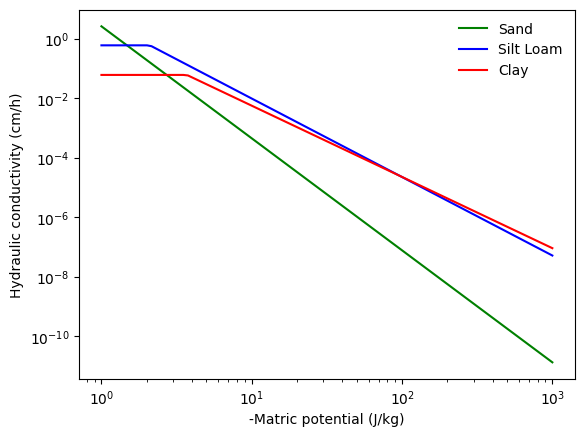

In [3]:
##Chapter_6.1

#Hydraulic conductivities of sand, silt loam, and clay

import matplotlib.pyplot as plt
import numpy as np

psi_m = np.logspace(0, 3, 100)     #logarithmic sequence of matric potential values

##For sand

psi_e_sand = -0.7       #kPa
b_sand = 1.7
theta_s = 0.5           #m^3/m^3

Ks_sand = 0.07 * (theta_s * (1 - (-psi_e_sand/33)**(1/b_sand)))**4                 #Equation_6.34 [cm/s]
K_sand = np.piecewise(-psi_m, [-psi_m < psi_e_sand, -psi_m >= psi_e_sand], [lambda x: Ks_sand*(psi_e_sand/x)**(2+3/b_sand), Ks_sand])    #Equation_6.35 [cm/s]

##For siltloam

psi_e_siltloam = -2.1   #kPa
b_siltloam = 4.7
theta_s = 0.5           #m^3/m^3

Ks_siltloam = 0.07 * (theta_s * (1 - (-psi_e_siltloam/33)**(1/b_siltloam)))**4     #Equation_6.34 [cm/s]
K_siltloam = np.piecewise(-psi_m, [-psi_m < psi_e_siltloam, -psi_m >= psi_e_siltloam], [lambda x: Ks_siltloam*(psi_e_siltloam/x)**(2+3/b_siltloam), Ks_siltloam])    #Equation_6.35 [cm/s]

##For clay

psi_e_clay = -3.7       #kPa
b_clay = 7.6
theta_s = 0.5           #m^3/m^3

Ks_clay = 0.07 * (theta_s * (1 - (-psi_e_clay/33)**(1/b_clay)))**4                 #Equation_6.34 [cm/s]
K_clay = np.piecewise(-psi_m, [-psi_m < psi_e_clay, -psi_m >= psi_e_clay], [lambda x: Ks_clay*(psi_e_clay/x)**(2+3/b_clay), Ks_clay])      #Equation_6.35 [cm/s]


plt.loglog(psi_m,K_sand*3600, "green")
plt.loglog(psi_m,K_siltloam*3600, "blue")
plt.loglog(psi_m,K_clay*3600, "red")
plt.xlabel('-Matric potential (J/kg)')
plt.ylabel('Hydraulic conductivity (cm/h)')
plt.legend(['Sand', 'Silt Loam', 'Clay'], frameon=False)
plt.legend
plt.show()


In [4]:
##Chapter_6.2

#Saturated hydraulic conductivity calculation

#Tillage temporarily decreases soil bulk density and increases porosity therefore, increasing the saturated hydraulic conductivity

import math
import numpy as np
#import matplotlib.pyplot as plt

bulk_density = (1500, 1200, 900)    #assumed values [Kg/m^3]
particle_density = 2650             #assumed value [Kg/m^3]
clay_frac = 0.32                    #assumed value
silt_frac = 0.42                    #assumed value
sand_frac = 1 - (clay_frac + silt_frac)

#The values 5.76, 2.3, and -1.96 are constants used for sand, silt, and clay, respectively

theta_s = {}

for i in bulk_density:
  porosity = 1 - i/particle_density                                              #m^3/m^3
  theta_s[i] = porosity                                                          #m^3/m^3
  dg = np.exp(sand_frac * (5.76) + silt_frac * (2.3) + clay_frac * (-1.96))      #Equation_2.36
  psi_e = 0.61 * np.log(dg) - 3.9                                                #Equation_5.36
  b = 8.25 - 1.26 * np.log(dg)                                                   #Equation_5.37
  Ks = 0.07 * (theta_s[i] * (1 - (-psi_e/33)**(1/b)))**4                         #Equation_6.34
  print('Ks =', Ks*3600, 'cm/hr')

print(theta_s)

Ks = 0.1206197770392125 cm/hr
Ks = 0.30485910400574334 cm/hr
Ks = 0.6468139154715297 cm/hr
{1500: 0.4339622641509434, 1200: 0.5471698113207547, 900: 0.6603773584905661}
